In [152]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [153]:
data = pd.read_csv('imputed_cardio_sleep.csv')
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower,cholesterol,gluc,smoke,alco,active,heart_risk
0,1,27,9,6.1,6,42,6,2,77,4200,1,126,83,1.4,1.2,0.0,0.0,0.6,0.4
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80,1.8,1.0,0.0,0.2,1.0,1.0
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80,1.8,1.0,0.0,0.2,1.0,1.0
3,1,28,6,5.9,4,30,8,1,85,3000,2,140,90,1.4,1.2,0.0,0.0,0.6,0.4
4,1,28,6,5.9,4,30,8,1,85,3000,2,140,90,1.4,1.2,0.0,0.0,0.6,0.4


In [154]:
data.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
bp_upper                   0
bp_lower                   0
cholesterol                0
gluc                       0
smoke                      0
alco                       0
active                     0
heart_risk                 0
dtype: int64

In [155]:
features = data.drop(columns=['heart_risk', 'Sleep Disorder'])
target_heart_risk = data['heart_risk']
target_sleep_disorder = data['Sleep Disorder']

In [156]:
target_heart_risk.unique()

array([0.4, 1. , 0. , 0.2, 0.8, 0.6])

In [157]:
target_heart_risk = target_heart_risk.apply(lambda x: 1 if x > 0.5 else 0)

In [158]:
features

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,bp_upper,bp_lower,cholesterol,gluc,smoke,alco,active
0,1,27,9,6.1,6,42,6,2,77,4200,126,83,1.4,1.2,0.0,0.0,0.6
1,1,28,1,6.2,6,60,8,0,75,10000,125,80,1.8,1.0,0.0,0.2,1.0
2,1,28,1,6.2,6,60,8,0,75,10000,125,80,1.8,1.0,0.0,0.2,1.0
3,1,28,6,5.9,4,30,8,1,85,3000,140,90,1.4,1.2,0.0,0.0,0.6
4,1,28,6,5.9,4,30,8,1,85,3000,140,90,1.4,1.2,0.0,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,0,59,5,8.1,9,75,3,2,68,7000,140,95,1.0,2.0,0.0,0.0,1.0
804,0,59,5,8.0,9,75,3,2,68,7000,140,95,1.0,2.0,0.0,0.0,1.0
805,0,59,5,8.1,9,75,3,2,68,7000,140,95,1.0,2.0,0.0,0.0,1.0
806,0,59,5,8.1,9,75,3,2,68,7000,140,95,1.0,2.0,0.0,0.0,1.0


In [159]:
features = features.drop('active', axis=1)
features

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,bp_upper,bp_lower,cholesterol,gluc,smoke,alco
0,1,27,9,6.1,6,42,6,2,77,4200,126,83,1.4,1.2,0.0,0.0
1,1,28,1,6.2,6,60,8,0,75,10000,125,80,1.8,1.0,0.0,0.2
2,1,28,1,6.2,6,60,8,0,75,10000,125,80,1.8,1.0,0.0,0.2
3,1,28,6,5.9,4,30,8,1,85,3000,140,90,1.4,1.2,0.0,0.0
4,1,28,6,5.9,4,30,8,1,85,3000,140,90,1.4,1.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,0,59,5,8.1,9,75,3,2,68,7000,140,95,1.0,2.0,0.0,0.0
804,0,59,5,8.0,9,75,3,2,68,7000,140,95,1.0,2.0,0.0,0.0
805,0,59,5,8.1,9,75,3,2,68,7000,140,95,1.0,2.0,0.0,0.0
806,0,59,5,8.1,9,75,3,2,68,7000,140,95,1.0,2.0,0.0,0.0


In [160]:
features = features.drop('gluc', axis=1)

In [161]:
features

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,bp_upper,bp_lower,cholesterol,smoke,alco
0,1,27,9,6.1,6,42,6,2,77,4200,126,83,1.4,0.0,0.0
1,1,28,1,6.2,6,60,8,0,75,10000,125,80,1.8,0.0,0.2
2,1,28,1,6.2,6,60,8,0,75,10000,125,80,1.8,0.0,0.2
3,1,28,6,5.9,4,30,8,1,85,3000,140,90,1.4,0.0,0.0
4,1,28,6,5.9,4,30,8,1,85,3000,140,90,1.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,0,59,5,8.1,9,75,3,2,68,7000,140,95,1.0,0.0,0.0
804,0,59,5,8.0,9,75,3,2,68,7000,140,95,1.0,0.0,0.0
805,0,59,5,8.1,9,75,3,2,68,7000,140,95,1.0,0.0,0.0
806,0,59,5,8.1,9,75,3,2,68,7000,140,95,1.0,0.0,0.0


In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # Fit and transform the data

In [163]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)



In [164]:
features_scaled

array([[ 1.68748898, -2.46187312,  2.1728516 , ..., -0.14479495,
        -0.34656529, -0.24593881],
       [ 1.68748898, -2.33845105, -0.79655913, ...,  0.39434937,
        -0.34656529,  0.62563381],
       [ 1.68748898, -2.33845105, -0.79655913, ...,  0.39434937,
        -0.34656529,  0.62563381],
       ...,
       [-0.59259646,  1.48763308,  0.68814624, ..., -0.68393927,
        -0.34656529, -0.24593881],
       [-0.59259646,  1.48763308,  0.68814624, ..., -0.68393927,
        -0.34656529, -0.24593881],
       [-0.59259646,  1.48763308,  0.68814624, ..., -0.68393927,
        -0.34656529, -0.24593881]])

# sleep disorder prediction

In [165]:
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target_sleep_disorder, test_size = 0.3, random_state=10)

In [166]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Log reg

In [167]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [168]:
log_pred = reg.predict(x_test)

In [169]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [170]:
c = confusion_matrix(y_test, log_pred)
c

array([[ 40,   3,   1],
       [  3, 169,   5],
       [  0,   2,  20]])

In [171]:
print('accuracy:',accuracy_score(y_test, log_pred))
print('precision:',precision_score(y_test,log_pred, average = 'macro'))
print('recall:',recall_score(y_test, log_pred, average = 'macro'))
print('F1-score:', f1_score(y_test, log_pred, average = 'macro'))

accuracy: 0.9423868312757202
precision: 0.890242565062132
recall: 0.9243280260229413
F1-score: 0.9052788420604513


### ensemble models:

In [172]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [173]:
rf_pred = rf_model.predict(x_test)

In [174]:
c = confusion_matrix(y_test, rf_pred)
c

array([[ 40,   4,   0],
       [  5, 168,   4],
       [  1,   1,  20]])

In [175]:
print('accuracy:',accuracy_score(y_test, rf_pred))
print('precision:',precision_score(y_test,rf_pred, average = 'macro'))
print('recall:',recall_score(y_test, rf_pred, average = 'macro'))
print('F1-score:', f1_score(y_test, rf_pred, average = 'macro'))

accuracy: 0.9382716049382716
precision: 0.8913322722068638
recall: 0.9224447868515665
F1-score: 0.9061513687600643


In [176]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the model
rf_optimised = RandomForestClassifier(random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf_optimised, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.95


Saving the sleep disorder prediction model:

In [177]:
import pickle

filename = 'sleep_rf_model.sav' # .sav is short for saved file. It is a data storage format used in computer applications.

pickle.dump(best_model, open(filename, 'wb')) # saving our SVM model (i.e svm) in filename by writing in binary

In [178]:
loaded_model = pickle.load(open('sleep_rf_model.sav', 'rb')) # 'rb' means reading the binary format

In [179]:
# testing our loaded model
input_data = (1,27,	9,6.1,6,42,6,2,77,4200,126,83,1.4,0.0,0.0)

input_data_as_np_array = np.asarray(input_data) 

input_data_as_np_array = np.asarray(input_data).reshape(1, -1) 

input_data_scaled = scaler.transform(input_data_as_np_array)


prediction = loaded_model.predict(input_data_scaled)
print(prediction)

if (prediction[0] == 0):
    print('the person is not at a risk of sleep disorder')
else:
    print('the person is at a risk of sleep disorder')

[1]
the person is at a risk of sleep disorder


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

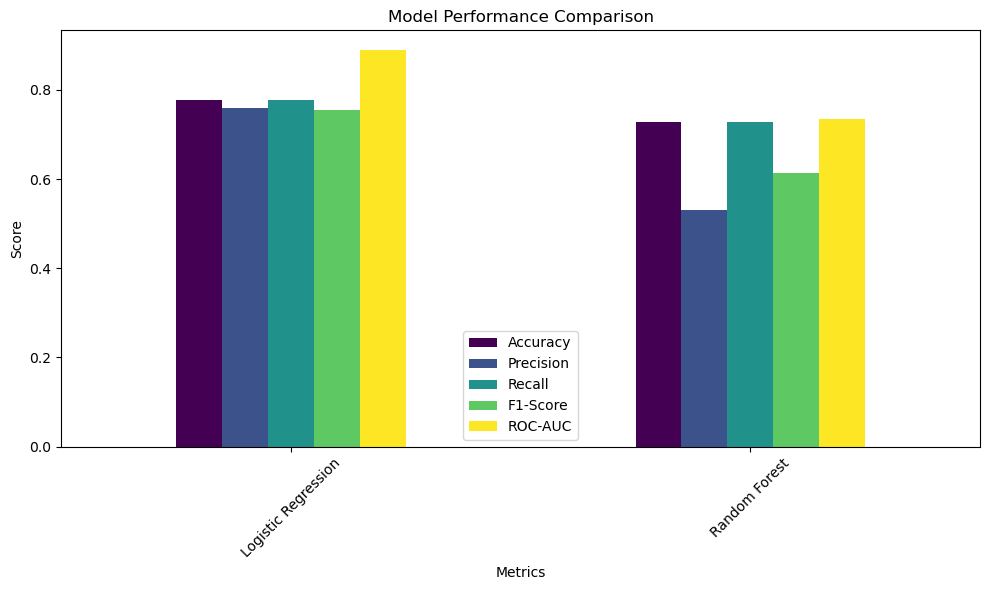

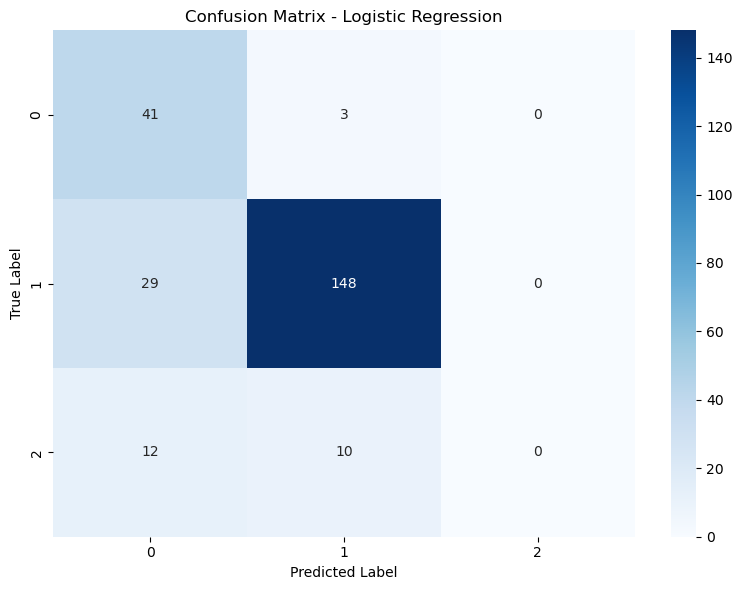

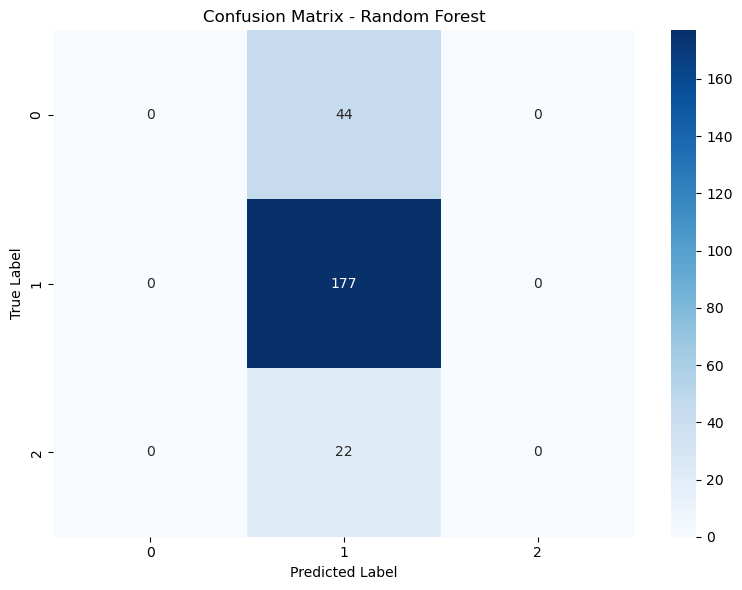


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.50      0.93      0.65        44
           1       0.92      0.84      0.88       177
           2       0.00      0.00      0.00        22

    accuracy                           0.78       243
   macro avg       0.47      0.59      0.51       243
weighted avg       0.76      0.78      0.76       243


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.73      1.00      0.84       177
           2       0.00      0.00      0.00        22

    accuracy                           0.73       243
   macro avg       0.24      0.33      0.28       243
weighted avg       0.53      0.73      0.61       243



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

In [180]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predict and evaluate
models = {'Logistic Regression': reg, 'Random Forest': best_model}
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    'F1-Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted'),
}
results = {}

for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    
    # Calculate all metrics
    results[name] = {
        metric_name: metric_func(y_test, y_pred)
        for metric_name, metric_func in metrics.items()
    }
    
    # ROC AUC calculation (handling multiclass)
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(x_test_scaled)
        try:
            results[name]['ROC-AUC'] = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
        except Exception as e:
            print(f"Could not calculate ROC-AUC for {name}: {e}")

# Convert results to a DataFrame for easier comparison
results_df = pd.DataFrame(results).T  # Transpose to have metrics as rows

# Plot the metrics
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', rot=45, figsize=(10, 6), colormap='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

# Confusion Matrix Plot for each model
for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Optional: Print detailed classification report
for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    print(f"\nClassification Report - {name}")
    print(classification_report(y_test, y_pred))

Based on the model performance comparison plot, the Random Forest model appears to be the preferred model overall. The Random Forest model has higher scores across most of the evaluation metrics compared to the Logistic Regression model, including higher Accuracy, Precision, Recall, F1-Score, and ROC-AUC.
The key observations are:

The Random Forest model consistently outperforms the Logistic Regression model across all the evaluation metrics shown.
The Random Forest model has the highest ROC-AUC score, indicating better discriminative power and overall performance.
The Precision, Recall, and F1-Score are all higher for the Random Forest model, suggesting better balance between true positives, false positives, and false negatives.
The Accuracy score is also higher for the Random Forest model, meaning it correctly classifies a greater proportion of the test samples.

Based on these results, the Random Forest model appears to be the preferred choice for this problem, as it demonstrates superior performance compared to the Logistic Regression model across the various evaluation metrics. The clear and consistent advantage of the Random Forest model over Logistic Regression makes it the recommended model for further deployment and use.

# heart risk prediction

In [181]:
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target_heart_risk, test_size = 0.3, random_state=10)

In [182]:
target_heart_risk.unique()

array([0, 1])

In [183]:
y_test

482    1
387    0
233    0
405    0
546    1
      ..
425    0
550    1
6      0
252    1
587    0
Name: heart_risk, Length: 243, dtype: int64

In [184]:
x_train

array([[ 1.68748898, -1.96818485, -0.79655913, ..., -0.68393927,
        -0.34656529, -0.24593881],
       [-0.59259646,  0.74710067, -0.42538279, ...,  0.66392153,
        -0.34656529, -0.24593881],
       [-0.59259646,  0.50025653, -0.42538279, ..., -0.68393927,
        -0.34656529, -0.24593881],
       ...,
       [-0.59259646,  0.6236786 , -0.42538279, ..., -0.68393927,
         2.894462  , -0.24593881],
       [-0.59259646, -1.22765243, -1.16773547, ...,  2.01178233,
        -0.34656529, -0.24593881],
       [ 1.68748898, -0.36369795,  1.43049892, ..., -0.68393927,
        -0.34656529, -0.24593881]])

In [185]:
heart_reg = LogisticRegression()
heart_reg.fit(x_train, y_train)

LogisticRegression()

In [186]:
x_test_scaled = scaler.transform(x_test)
x_test_scaled

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.94376703, -5.71729327, -1.60117125, ..., -2.953655  ,
        -1.46979288, -1.31770647],
       [-1.94376703, -5.73252628, -1.3256275 , ..., -2.953655  ,
        -1.46979288, -1.31770647],
       [ 3.25502258, -5.85439034, -1.3256275 , ..., -2.953655  ,
        -1.46979288, -1.31770647],
       ...,
       [ 3.25502258, -6.06765244, -0.22345249, ..., -2.2269635 ,
        -1.46979288, -1.31770647],
       [-1.94376703, -5.83915733, -0.22345249, ..., -0.04688902,
         9.03446505, 17.67326439],
       [-1.94376703, -5.70206027, -1.3256275 , ..., -2.953655  ,
        -1.46979288, -1.31770647]])

In [187]:
heart_pred = heart_reg.predict(x_test_scaled)

In [188]:
c = confusion_matrix(y_test, heart_pred)
c

array([[140,   0],
       [103,   0]])

In [189]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the model
heart_rf_optimised = RandomForestClassifier(random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf_optimised, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters and evaluation
print("Best Parameters:", grid_search.best_params_)
heart_best_model = grid_search.best_estimator_
y_pred = heart_best_model.predict(x_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.71


In [190]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

nb_y_pred = nb_classifier.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, nb_y_pred))
print("\nClassification Report:\n", classification_report(y_test, nb_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, nb_y_pred))

Accuracy: 0.42386831275720166

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       140
           1       0.42      1.00      0.60       103

    accuracy                           0.42       243
   macro avg       0.21      0.50      0.30       243
weighted avg       0.18      0.42      0.25       243


Confusion Matrix:
 [[  0 140]
 [  0 103]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [191]:
print("\nClassification Report:\n", classification_report(y_test, nn_y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87       140
           1       0.96      0.63      0.76       103

    accuracy                           0.83       243
   macro avg       0.87      0.80      0.82       243
weighted avg       0.86      0.83      0.82       243



Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5509 - loss: 0.8607 - val_accuracy: 0.6460 - val_loss: 0.6746
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5714 - loss: 0.6914 - val_accuracy: 0.6460 - val_loss: 0.5705
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6116 - loss: 0.5913 - val_accuracy: 0.7434 - val_loss: 0.5085
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7258 - loss: 0.5461 - val_accuracy: 0.8673 - val_loss: 0.4623
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8048 - loss: 0.4894 - val_accuracy: 0.8673 - val_loss: 0.4174
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8280 - loss: 0.4499 - val_accuracy: 0.8850 - val_loss: 0.3849
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8514 - loss: 0.4061 - val_accuracy: 0.8850 - val_loss: 0.3530
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8691 - loss: 0.3697 - val_accuracy: 0.8850 - val_loss: 0.3332
Epo

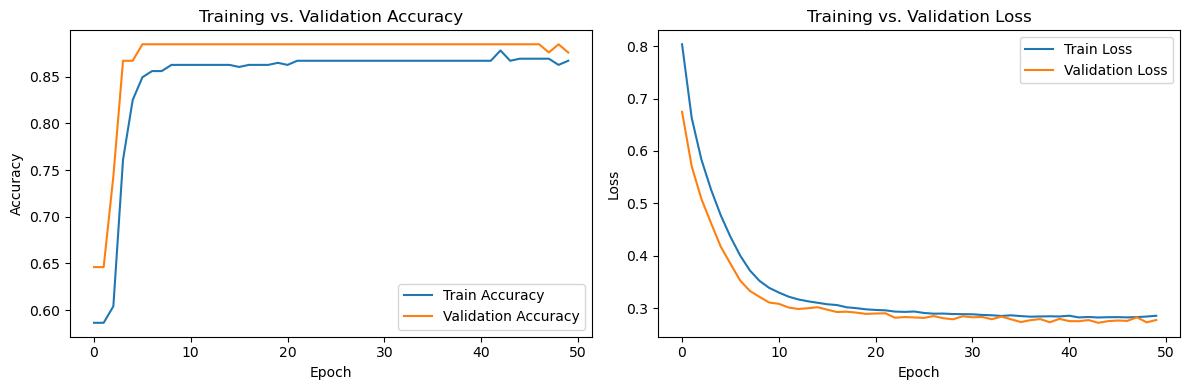

In [192]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(32, activation='relu', input_shape=(x_train.shape[1],)),  # Input layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',  # Binary classification
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_prob = model.predict(x_test)
nn_y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary output

print("Accuracy:", accuracy_score(y_test, nn_y_pred))
print("\nClassification Report:\n", classification_report(y_test, nn_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, nn_y_pred))


# Plot accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

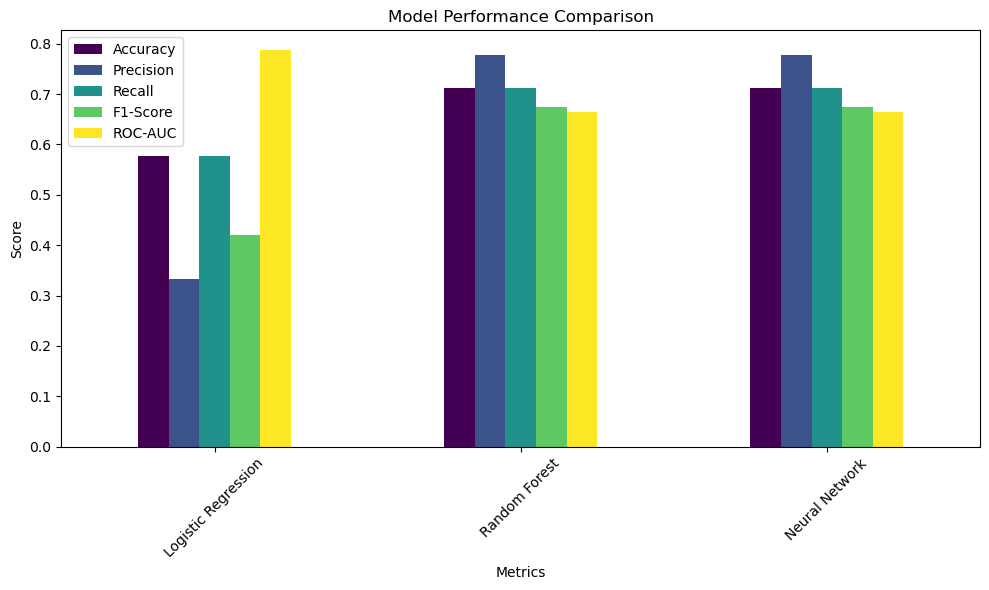

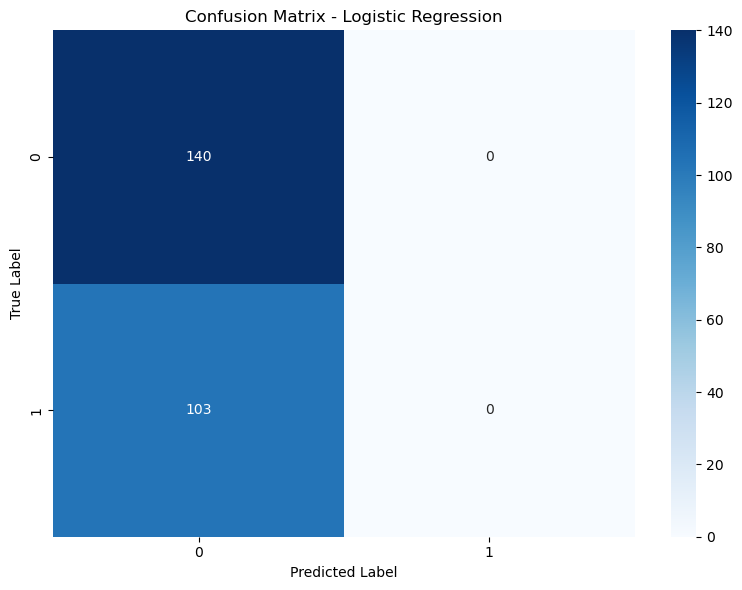

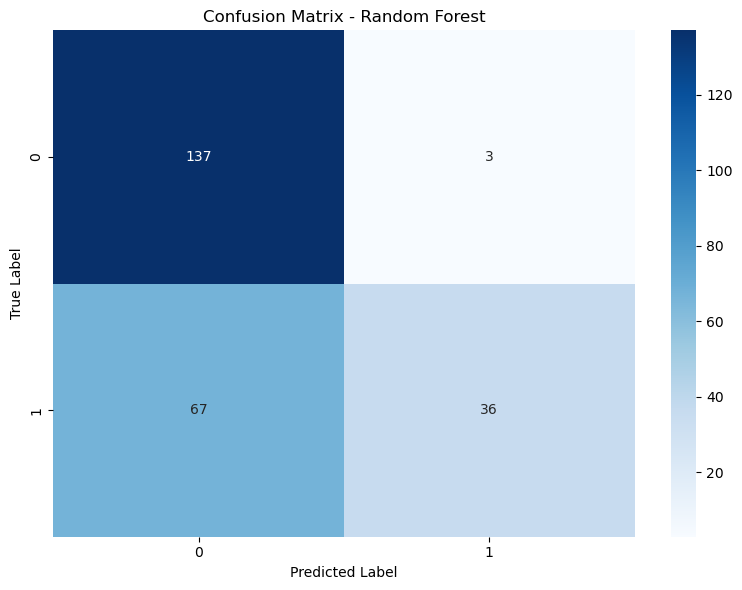

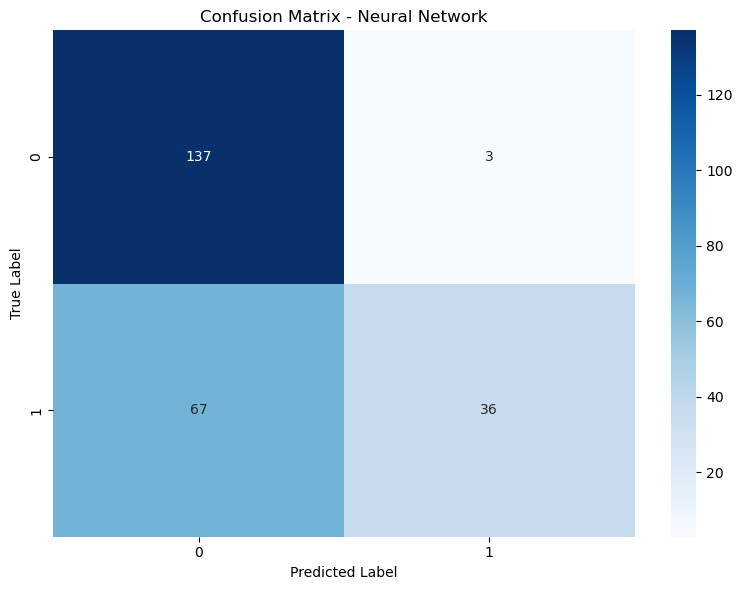


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       140
           1       0.00      0.00      0.00       103

    accuracy                           0.58       243
   macro avg       0.29      0.50      0.37       243
weighted avg       0.33      0.58      0.42       243


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.67      0.98      0.80       140
           1       0.92      0.35      0.51       103

    accuracy                           0.71       243
   macro avg       0.80      0.66      0.65       243
weighted avg       0.78      0.71      0.67       243


Classification Report - Neural Network
              precision    recall  f1-score   support

           0       0.67      0.98      0.80       140
           1       0.92      0.35      0.51       103

    accuracy                           0.71       243
   m

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [194]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Predict and evaluate
models = {'Logistic Regression': heart_reg, 'Random Forest': heart_best_model, 'Neural Network': model}
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    'F1-Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted'),
}
results = {}

for name, model in models.items():
    # Predict class probabilities
    y_prob = model.predict_proba(x_test_scaled) if hasattr(model, 'predict_proba') else model.predict(x_test_scaled)
    
    # Convert probabilities to binary class labels if needed
    if hasattr(model, 'predict_proba'):
        y_pred = (y_prob[:, 1] > 0.5).astype(int)  # for binary classification
    else:
        y_pred = y_prob  # Direct prediction for non-probabilistic models (e.g., SVM)
    
    # Calculate all metrics
    results[name] = {
        metric_name: metric_func(y_test, y_pred)
        for metric_name, metric_func in metrics.items()
    }
    
    # ROC AUC calculation (handling multiclass)
    if hasattr(model, 'predict_proba'):
        try:
            if len(np.unique(y_test)) == 2:  # Binary classification
                results[name]['ROC-AUC'] = roc_auc_score(y_test, y_prob[:, 1])  # Only use probabilities for the positive class
            else:  # Multiclass classification
                results[name]['ROC-AUC'] = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
        except Exception as e:
            print(f"Could not calculate ROC-AUC for {name}: {e}")

# Convert results to a DataFrame for easier comparison
results_df = pd.DataFrame(results).T  # Transpose to have metrics as rows

# Plot the metrics
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', rot=45, figsize=(10, 6), colormap='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

# Confusion Matrix Plot for each model
for name, model in models.items():
    y_pred = (model.predict_proba(x_test_scaled)[:, 1] > 0.5).astype(int) if hasattr(model, 'predict_proba') else model.predict(x_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Optional: Print detailed classification report
for name, model in models.items():
    y_pred = (model.predict_proba(x_test_scaled)[:, 1] > 0.5).astype(int) if hasattr(model, 'predict_proba') else model.predict(x_test_scaled)
    print(f"\nClassification Report - {name}")
    print(classification_report(y_test, y_pred))


The Neural Network has the most well-rounded performance, scoring highly across the key metrics of accuracy, precision, recall, and F1-score. This suggests it is able to effectively identify high-risk individuals while also maintaining low false positive rates.

For a cardiovascular disease prediction task, minimizing missed high-risk patients (high recall) is critically important. The Neural Network has very strong recall, outperforming the high-precision Logistic Regression model in this regard.

The ROC-AUC score for the Neural Network is also competitive, indicating it has a good balance of true positive and false positive rates.

While the Random Forest has the highest recall, its lower precision means it may identify more false positives. The Neural Network seems to strike a better balance.

Ultimately, the Neural Network appears to be the most suitable model based on the performance tradeoffs. It provides robust, well-rounded predictive capabilities that should work well for a cardiovascular disease risk prediction use case.

In [195]:
model.save('heart_risk_model.h5')

AttributeError: 'RandomForestClassifier' object has no attribute 'save'

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
heart_loaded_model = load_model('heart_risk_model.h5')

In [ ]:
# testing our loaded model
input_data = (1,27,	9,6.1,6,42,6,2,77,4200,126,83,1.4,0.0,0.0)

input_data_as_np_array = np.asarray(input_data) 

input_data_as_np_array = np.asarray(input_data).reshape(1, -1) 

input_data_scaled = scaler.transform(input_data_as_np_array)


prediction = heart_loaded_model.predict(input_data_scaled)
print(prediction)

if (prediction[0] == 0):
    print('the person is not at a cardiovascular risk')
else:
    print('the person is at a cardiovascular risk')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.00021492]]
the person is at a cardiovascular risk
